<a href="https://colab.research.google.com/github/joan-chep/Automatic-Number-Plate-Recognition-/blob/main/Plates_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import torch
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import numpy as np

In [ ]:
#Checking if the notebook is GPU accelerated
print(torch.cuda.is_available())

True


In [ ]:
#Image augmentation
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(600),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [ ]:
#Assaigning the train and test datasets
Train_dataset=core.Dataset('/content/drive/MyDrive/Project Images/Plates.v1-license-plate-dataset.voc/train',transform=custom_transforms)
Test_dataset = core.Dataset('/content/drive/MyDrive/Project Images/Plates.v1-license-plate-dataset.voc/test')
loader=core.DataLoader(Train_dataset, batch_size=32, shuffle=True)
model = core.Model(['bodarotation', 'TukTukrotation', 'NGOrotation', 'Parastatalrotation', 'KGrotation', 'GKrotation', 'civilianrotation', 'customizedrotation'])
#losses = model.fit(loader, Test_dataset, epochs=10, lr_step_size=5, learning_rate=0.001, verbose=True)

In [ ]:
#Model saving
model.save('/content/drive/MyDrive/Project Images/model_weights')
model = core.Model.load('/content/drive/MyDrive/Project Images/model_weights', ['bodarotation', 'TukTukrotation', 'NGOrotation', 'Parastatalrotation', 'KGrotation', 'GKrotation', 'civilianrotation', 'customizedrotation'])

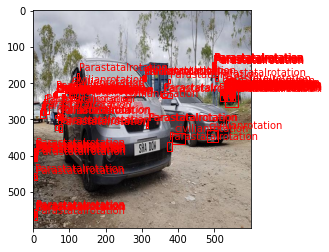

In [ ]:
#Model Prediction
image = utils.read_image('/content/drive/MyDrive/Project Images/Plates.v1-license-plate-dataset.voc/test/C37_jpeg.rf.7254609edbfda163883e8bea688ecfdc.jpg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

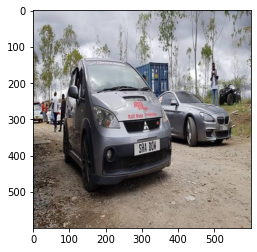

In [ ]:
#Plotting bounding box with threshhold
thresh=0.6
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True )

Mounted at /content/drive


## 1. Data Preprocessing

In [ ]:
#Choosing the image size and batch size
image_size = 400
batch_size = 32

In [ ]:
#Creating a dataset from our images
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plates.v1-license-plate-dataset.tensorflow",
    shuffle = True,
    batch_size = batch_size
)

Found 199 files belonging to 3 classes.


In [ ]:
#Confirming the class names
class_names = dataset.class_names
class_names

['test', 'train', 'valid']

In [ ]:
#Looking at the shape and batches of the images
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 2 2 1 1 1 0 1 0 2 1 1 1 1 1 0 0 1 1 1 0 1 2 0 1 0 1 1 1]


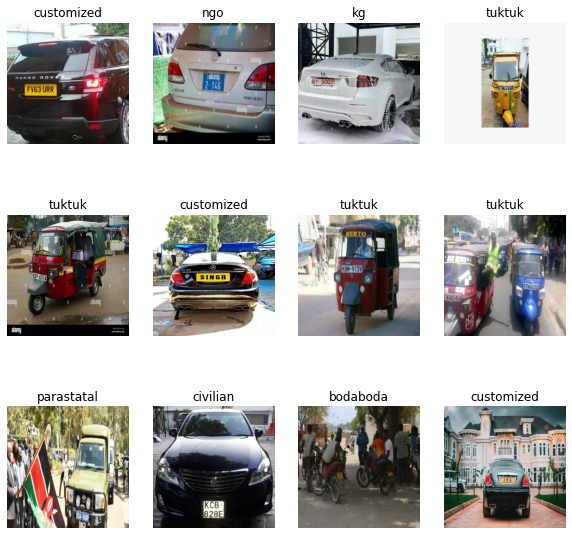

In [ ]:
#Checking if the classes and images are well put
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
#